# Natural Language Processing - Hotel Reviews Sentiment Prediction

## Libraries and settings

In [1]:
# Libraries
import os
import re
import numpy as np
import pandas as pd
import random
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk

# Import only once
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Set seed
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('Current working directory:', os.getcwd())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Current working directory: c:\Users\diego\OneDrive\Documentos\GitHub\data_analytics_zhaw\Week_11


## Import hotel reviews
- For detailed description of data see: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

In [27]:
# Import original data
data_orig = pd.read_csv('tripadvisor_hotel_reviews.csv', sep=",", encoding='utf-8')
data_orig = pd.read_csv('movie_reviews.tsv', sep= '\t')

# Subset of the data
sub_low = data_orig.loc[data_orig['sentiment'] == 0].sample(n=1000, random_state=42)
sub_high = data_orig.loc[data_orig['sentiment'] == 1].sample(n=1000, random_state=42)
#sub_05 = data_orig.loc[data_orig['Rating'].isin([5])].sample(n=1000, random_state=42)

# Concatenating the subsets to one data frame
data = pd.concat([sub_low, sub_high]).reset_index(drop=True)
print('Number of reviews in data: {}'.format(len(data)))

data

Number of reviews in data: 2000


,id,sentiment,review
0,2970_4,0,I am a back Batman movie and TV fan. I loved t...
1,11239_1,0,Pay no attention to the comments behind the cu...
2,6265_1,0,I happen to be the director's nephew. It's tak...
3,6067_1,0,SLIGHT SPOILERS (but it doesn't matter anyway)...
4,6497_1,0,I actually had quite high hopes going into thi...
...,...,...,...
1995,3341_7,1,I saw this movie on Thursdays night after havi...
1996,5622_10,1,Farrah Fawcett gives an award nominated perfor...
1997,12284_7,1,Could not understand why Jeremy Irons felt it ...
1998,8962_9,1,"As a Pagan, I must say this movie has little i..."


## Check missing values

In [28]:
data.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

## Number of hotel reviews per sentiment class in 'data'

In [30]:
df_class = data['sentiment'].value_counts()
df_class

sentiment
0    1000
1    1000
Name: count, dtype: int64

## Wordcloud with most frequently used words

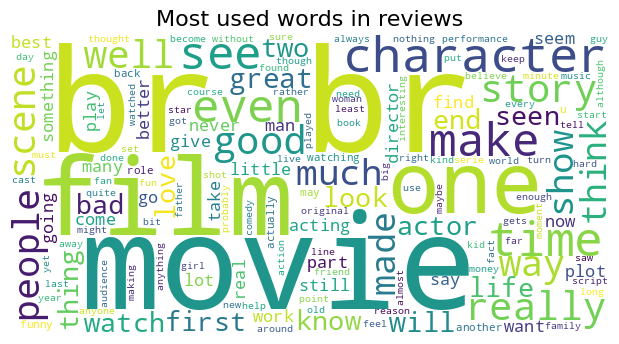

In [36]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='white',
                          min_font_size = 8
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(data['review'], title="Most used words in reviews")

## Define X and y data

In [37]:
X = data['review'].copy()
y = data['sentiment'].copy()

print('Movie Reviews:')
print(X)

print('\nSentiments:')
print(y)

Movie Reviews:
0       I am a back Batman movie and TV fan. I loved t...
1       Pay no attention to the comments behind the cu...
2       I happen to be the director's nephew. It's tak...
3       SLIGHT SPOILERS (but it doesn't matter anyway)...
4       I actually had quite high hopes going into thi...
                              ...                        
1995    I saw this movie on Thursdays night after havi...
1996    Farrah Fawcett gives an award nominated perfor...
1997    Could not understand why Jeremy Irons felt it ...
1998    As a Pagan, I must say this movie has little i...
1999    After seeing several movies of Villaronga, I h...
Name: review, Length: 2000, dtype: object

Sentiments:
0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: sentiment, Length: 2000, dtype: int64


## Distribution of sentence length

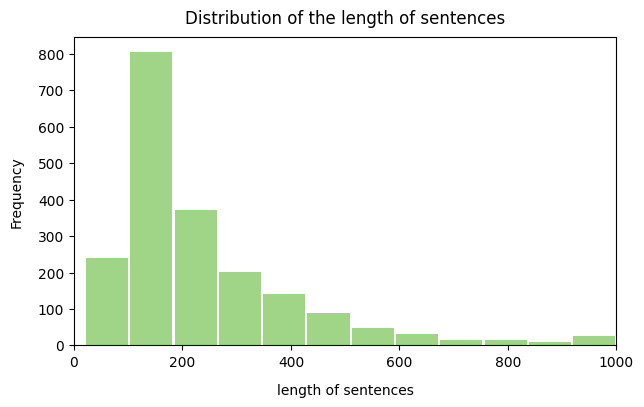

In [38]:
# Calculate length
length_dist = [len(x.split(" ")) for x in X]

# Plot Histogram
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=length_dist, 
                            bins=30, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.ticklabel_format(style='plain')

# Set x limits
plt.xlim(0, 1000)

# Set labels
plt.xlabel('length of sentences', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Distribution of the length of sentences', fontsize=12, pad=10)

plt.show()

## Text preprocessing
### Steps:
- Removing punctuations
- Text to lowercase
- Tokenization
- Removing stopwords
- Stemming/Lemmatization

### Removing punctuations

In [40]:
# Defining the function to remove punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Storing the puntuation free text
X_cleaned_01 = X.apply(lambda x:remove_punctuation(x))
X_cleaned_01

0       I am a back Batman movie and TV fan I loved th...
1       Pay no attention to the comments behind the cu...
2       I happen to be the directors nephew Its taken ...
3       SLIGHT SPOILERS but it doesnt matter anywaybr ...
4       I actually had quite high hopes going into thi...
                              ...                        
1995    I saw this movie on Thursdays night after havi...
1996    Farrah Fawcett gives an award nominated perfor...
1997    Could not understand why Jeremy Irons felt it ...
1998    As a Pagan I must say this movie has little if...
1999    After seeing several movies of Villaronga I ha...
Name: review, Length: 2000, dtype: object

### Text to lowercase

In [41]:
X_cleaned_02 = X_cleaned_01.apply(lambda x: x.lower())
X_cleaned_02

0       i am a back batman movie and tv fan i loved th...
1       pay no attention to the comments behind the cu...
2       i happen to be the directors nephew its taken ...
3       slight spoilers but it doesnt matter anywaybr ...
4       i actually had quite high hopes going into thi...
                              ...                        
1995    i saw this movie on thursdays night after havi...
1996    farrah fawcett gives an award nominated perfor...
1997    could not understand why jeremy irons felt it ...
1998    as a pagan i must say this movie has little if...
1999    after seeing several movies of villaronga i ha...
Name: review, Length: 2000, dtype: object

### Tokenization

In [42]:
# Function for tokenization
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

# Applying function
X_cleaned_03 = X_cleaned_02.apply(lambda x: tokenization(x))
X_cleaned_03

0       [i, am, a, back, batman, movie, and, tv, fan, ...
1       [pay, no, attention, to, the, comments, behind...
2       [i, happen, to, be, the, directors, nephew, it...
3       [slight, spoilers, but, it, doesnt, matter, an...
4       [i, actually, had, quite, high, hopes, going, ...
                              ...                        
1995    [i, saw, this, movie, on, thursdays, night, af...
1996    [farrah, fawcett, gives, an, award, nominated,...
1997    [could, not, understand, why, jeremy, irons, f...
1998    [as, a, pagan, i, must, say, this, movie, has,...
1999    [after, seeing, several, movies, of, villarong...
Name: review, Length: 2000, dtype: object

### Removing stopwords

In [43]:
# Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

# Print stopwords
print('English stopwords:')
print(stopwords)

# Defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

# Applying the function
X_cleaned_04 = X_cleaned_03.apply(lambda x:remove_stopwords(x))
X_cleaned_04

English stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sam

0       [back, batman, movie, tv, fan, loved, show, ne...
1       [pay, attention, comments, behind, curtain, ma...
2       [happen, directors, nephew, taken, years, get,...
3       [slight, spoilers, doesnt, matter, anywaybr, b...
4       [actually, quite, high, hopes, going, movie, t...
                              ...                        
1995    [saw, movie, thursdays, night, really, boring,...
1996    [farrah, fawcett, gives, award, nominated, per...
1997    [could, understand, jeremy, irons, felt, neces...
1998    [pagan, must, say, movie, little, magickal, si...
1999    [seeing, several, movies, villaronga, pretty, ...
Name: review, Length: 2000, dtype: object

### Stemming

In [44]:
# Defining the object for stemming
porter_stemmer = PorterStemmer()

# Defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

# Applying the function (we use X_cleaned_04 here)
X_cleaned_05 = X_cleaned_04.apply(lambda x: stemming(x))
X_cleaned_05

0       [back, batman, movi, tv, fan, love, show, new,...
1       [pay, attent, comment, behind, curtain, major,...
2       [happen, director, nephew, taken, year, get, h...
3       [slight, spoiler, doesnt, matter, anywaybr, br...
4       [actual, quit, high, hope, go, movi, took, giv...
                              ...                        
1995    [saw, movi, thursday, night, realli, bore, day...
1996    [farrah, fawcett, give, award, nomin, perform,...
1997    [could, understand, jeremi, iron, felt, necess...
1998    [pagan, must, say, movi, littl, magick, signif...
1999    [see, sever, movi, villaronga, pretti, clear, ...
Name: review, Length: 2000, dtype: object

### Lemmatization

In [45]:
# Defining the object for lemmatization
lemmatizer = WordNetLemmatizer()

# Defining a function for lemmatization
def lemm(text):
    lemm_text = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemm_text

# Applying the function (we use X_cleaned_04 here)
X_cleaned_06 = X_cleaned_04.apply(lambda x: lemm(x))
X_cleaned_06

0       [back, batman, movie, tv, fan, love, show, new...
1       [pay, attention, comment, behind, curtain, maj...
2       [happen, directors, nephew, take, years, get, ...
3       [slight, spoilers, doesnt, matter, anywaybr, b...
4       [actually, quite, high, hop, go, movie, take, ...
                              ...                        
1995    [saw, movie, thursdays, night, really, bore, d...
1996    [farrah, fawcett, give, award, nominate, perfo...
1997    [could, understand, jeremy, iron, felt, necess...
1998    [pagan, must, say, movie, little, magickal, si...
1999    [see, several, movies, villaronga, pretty, cle...
Name: review, Length: 2000, dtype: object

## Document-Term Matrix

In [46]:
# Define dummy variable
def dummy_fun(doc):
    return doc

count = CountVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)

# Document-Term Matrix (we use 'X_cleaned_06' as the input)
X_cleaned_07 = count.fit_transform(X_cleaned_06).toarray()
print('Document-Term Matrix:')
print(X_cleaned_07)

# Shape
print('\nShape of the Document-Term Matrix')
print(X_cleaned_07.shape)

# Summary statistics
print('\nSummary statistics')
print(f'min: {np.min(X_cleaned_07):.4f}')
print(f'max: {np.max(X_cleaned_07):.4f}')

Document-Term Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Shape of the Document-Term Matrix
(2000, 27254)

Summary statistics
min: 0.0000
max: 28.0000


## Term Frequency - Inverse Document Frequency (TF-IDF) Matrix

In [47]:
# Define dummy variable
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)

# TF-IDF Matrix (we use 'X_cleaned_06' as the input)
X_cleaned_08 = tfidf.fit_transform(X_cleaned_06).toarray()
print('TF-IDF Matrix:')
print(X_cleaned_08)

# Shape
print('\nShape of the TF-IDF Matrix')
print(X_cleaned_08.shape)

# Summary statistics
print('\nSummary statistics')
print(f'min: {np.min(X_cleaned_08):.4f}')
print(f'max: {np.max(X_cleaned_08):.4f}')

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Shape of the TF-IDF Matrix
(2000, 27254)

Summary statistics
min: 0.0000
max: 0.8427


## Split data into train/test

In [48]:
# Train/test samples
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_08, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=67)

# Print X_train
print('X_train:')
print(X_train)

# Print y_train
print('\ny_train:')
print(y_train)

X_train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y_train:
1778    1
220     0
544     0
696     0
1764    1
       ..
7       0
1477    1
1738    1
821     0
835     0
Name: sentiment, Length: 1600, dtype: int64


## Model Training

In [49]:
# Initialize the random forest model 
rfc = RandomForestClassifier(max_depth=20,
                             n_estimators=200,
                             min_samples_leaf=15,
                             random_state=42)

# Train the random forest model
rfc = rfc.fit(X_train, y_train)

##  Model Evaluation

### Create model predictions

In [50]:
# Predict the target variable
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,

### Measuring the Accuracy

In [51]:
# Accuracy
print(f'Accuracy: {accuracy_score(y_pred, y_test):.4f}')

Accuracy: 0.7875


### Confusion matrix

In [52]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[156  40]
 [ 45 159]]


### Classification Report

In [53]:
# Classification Report
print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       196
           1       0.80      0.78      0.79       204

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [54]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-12-10 09:35:57
Python Version: 3.10.5
-----------------------------------
